In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resultado = pd.read_csv('20210330-resultado_preliminar_prova_objetiva.csv')
resultado.head()

,Inscrição,Nome do Candidato,Pontuação,Ações Afirmativas,Classificado
0,650,Carlos Danilo Tomé,18,NaN,1
1,834,Lucas Galdino De Camargo,18,NaN,1
2,976,Vinicius Vieira Albano,18,NaN,1
3,988,Amanda Rodrigues Da Silva,17,NaN,1
4,840,Carolina Ensfeld Lueders,17,NaN,1


## Classificados

In [3]:
print("Total classificados =", resultado['Classificado'].sum())

Total classificados = 64


In [4]:
corte = min(resultado[resultado['Ações Afirmativas'].isna() & resultado['Classificado'] == 1]['Pontuação'])
print("Nota de corte (ampla concorrência) =", corte)

Nota de corte (ampla concorrência) = 14


## Distribuição de notas

In [5]:
resultado['Pontuação'].describe()

count    234.000000
mean      10.264957
std        3.863315
min        0.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       18.000000
Name: Pontuação, dtype: float64

In [6]:
resultado.groupby(resultado['Pontuação']).agg({'Inscrição': 'count', 'Classificado': 'sum'}).sort_index(ascending = False)

,Inscrição,Classificado
Pontuação,,
18,3,3
17,12,12
16,4,4
15,19,19
14,14,14
13,18,1
12,18,2
11,26,4
10,20,0


<AxesSubplot:>

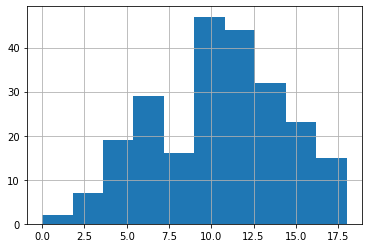

In [7]:
resultado['Pontuação'].hist()